<a href="https://colab.research.google.com/github/manhanton/DataInsight/blob/master/QE_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle dataset to colab

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yothinpukongnin","key":"834c3451a0d6cc7946f448a74e89631f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d yothinpukongnin/naphtha-plant-parameters

 85% 43.0M/50.6M [00:00<00:00, 80.5MB/s]
100% 50.6M/50.6M [00:00<00:00, 146MB/s] 


In [ ]:
!ls

kaggle.json		  naphtha-plant-parameters.zip
naphtha-plant-parameters  sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('naphtha-plant-parameters.zip', 'r')
zip_ref.extractall('naphtha-plant-parameters')
zip_ref.close()

# Read file as dataframe with Pandas

In [ ]:
import pandas as pd

qe_data = pd.read_csv('/content/naphtha-plant-parameters/QE.csv',index_col=0)
qe_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,18,19,21,22,23,24,25,28,29,31,38,46,54,70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01-Nov-20 00:00:00,5473.115629,5132.585301,318.473802,1100.301227,2650.518273,377.997393,365.447174,-28.35338013,79.637960,196.485967,60.578774,58.664310,24.014317,10.497653,11.683639,0.831106,0.630034,4.75297,24.0459,51.195625,28.0352,141.078,208.879,243.126,112.541,88.870162,241.946279,343.344,38.4883,69.759743,197.894,285.650112,106.278031,142.919547,127.767545,49.795978,39.999690,14.5126,5303.841444,2683.358126,59.902646,0.901945,12.776808,93.244148,9.655762,4329.94,21.558279,285.494263,106.452896,142.983917,128.833672,45.0,36.0,14.5027,5320.127604,2664.229248,60.580307,0.900216,93.251854,52.380798,49.504946,33.136327,43.0,100.0,100.0,86.867836,59.100008,73.797301,60.338306,23.0628,54.418942
01-Nov-20 00:01:00,5475.438749,5120.646039,315.223760,1093.768775,2656.073757,378.872248,366.279280,-18.5953319,79.441485,196.571489,60.865404,58.402002,24.016989,10.497660,11.677059,0.834066,0.630034,4.75297,24.0447,51.208576,28.0385,141.169,208.86,243.119,112.333,88.670296,241.943374,343.349,38.5155,69.988098,197.891,285.653490,106.066636,143.003414,126.745393,49.801282,40.002905,14.5641,5315.334190,2665.731542,59.971468,0.902144,12.778001,93.242376,9.655762,4342.27,21.626544,285.494263,106.452896,142.983917,126.779511,45.0,36.0,14.5209,5344.888151,2670.399841,60.580307,0.900216,93.251854,52.263659,49.246906,32.999224,43.0,100.0,100.0,86.866629,59.510366,73.788200,60.335461,23.1626,54.142016
01-Nov-20 00:02:00,5477.715369,5131.270807,314.913885,1110.856587,2652.403192,379.059051,366.868707,-19.71849558,79.701140,194.491751,60.547472,58.852298,24.017672,10.497668,11.652334,0.837011,0.630034,4.75297,24.0434,51.100286,28.0417,141.042,208.84,243.112,112.372,89.115927,241.940469,343.355,38.5427,70.492851,197.887,285.656868,106.394233,142.862961,128.536175,49.806587,40.006120,14.5451,5338.376483,2665.373443,60.040290,0.903485,12.779194,93.240690,9.667305,4336.17,21.650153,285.494263,106.452896,142.983917,126.844220,45.0,36.0,14.6123,5354.761882,2670.724609,60.580307,0.900216,93.251854,52.145119,49.940832,33.352866,43.0,100.0,100.0,86.865421,59.170822,73.779099,60.332616,23.2625,53.529461
01-Nov-20 00:03:00,5468.293868,5132.134419,318.080306,1130.687789,2672.516094,378.712819,366.383035,-31.50455618,80.307328,190.893042,60.281609,59.670641,24.016814,10.497676,11.625345,0.836354,0.630034,4.75297,24.0421,51.046354,28.045,141.075,208.804,243.105,112.6,89.434049,241.937564,343.36,38.5698,70.634480,197.884,285.660246,106.868348,142.844744,130.892183,49.811891,40.009335,14.52,5278.328239,2646.375047,60.173837,0.904879,12.780387,93.239116,14.734650,4338.7,21.609391,285.494263,106.452896,142.983917,130.455032,45.0,36.0,14.4615,5311.401823,2671.541943,60.580307,0.900216,93.251854,52.104971,50.856711,33.406574,43.0,100.0,100.0,86.864214,58.619840,73.769998,60.329771,23.3788,53.423187
01-Nov-20 00:04:00,5466.576506,5108.575193,324.243931,1144.482568,2646.085167,378.371290,365.897363,-28.31419792,80.729530,185.649872,60.483942,60.174207,24.015957,10.497684,11.622109,0.832907,0.630034,4.75297,24.0409,51.267421,28.0482,141.315,208.746,243.097,112.328,88.567944,241.934659,343.365,38.597,70.452314,197.814,285.663624,107.106242,143

**Clean the string in numeric**

In [ ]:
qe_data = qe_data.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [ ]:
qe_data.shape

(154474, 71)

# Data Info. before cleaning and resampling

**Data description**

In [ ]:
qe_data.describe()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP
count,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000,154474.000000
mean,5083.008601,5039.972244,332.167103,1511.605098,2797.323525,339.900009,318.110647,229.577875,81.643750,164.874760,57.045284,52.992596,23.906883,10.324531,11.711134,0.599223,0.529090,4.755050,23.794672,46.886136,28.199307,148.843915,207.214839,230.078745,125.482666,109.380751,227.821000,338.553162,36.074226,64.365995,199.341153,285.504325,107.920084,150.814160,118.189622,45.671267,40.651709,15.007536,4827.153359,2265.442728,58.398939,0.893579,12.606774,89.599477,34.778592,4114.545394,17.837023,285.501864,107.920368,150.957754,118.188338,44.766372,40.326629,15.007730,4827.562289,2265.470026,58.415250,0.893493,89.600590,45.445948,67.937620,35.277011,13.599410,63.081838,67.819692,85.306886,56.291024,63.731555,51.232865,21.012006,44.912362
std,595.912822,593.983829,54.564293,238.093326,890.584625,50.306978,48.173827,200.236386,5.278767,14.544028,3.030154,6.825793,0.132164,0.152678,0.095672,0.172090,0.115648,0.029129,0.284494,7.365206,2.008231,2.722078,3.247028,7.809994,6.034618,9.105837,8.325348,5.107017,3.785700,4.518950,2.875482,0.193940,1.623520,2.754860,6.247635,1.567309,2.681834,1.403710,579.724149,290.579685,3.726970,0.012995,0.374141,2.006246,52.253032,458.477059,2.818400,0.099969,1.587151,2.867194,6.252460,1.685536,2.987342,1.403132,573.299483,290.256712,3.572108,0.011820,2.002274,6.881501,10.698410,11.689954,9.874262,42.459691,25.815209,7.719182,3.144287,7.727703,6.539756,2.345561,6.344270
min,-234.413740,1584.317036,179.824392,782.453737,21.980829,244.841166,208.793846,-74.859016,11.725516,9.797221,42.790048,36.200656,22.933874,10.192916,11.432382,0.274922,0.255065,4.477923,22.552530,32.650692,20.130989,140.040140,200.009800,215.532405,110.573467,85.689859,205.832270,325.417283,23.386803,42.947599,192.616890,279.045321,95.370792,141.914793,105.273471,37.877482,32.443839,-0.239379,2685.912432,1302.661045,27.959098,0.798593,11.246803,79.378304,9.655762,-78.377342,12.070791,277.581609,95.185186,142.980234,104.838294,36.000000,32.000000,0.000000,2651.089014,1310.770508,27.803823,0.804364,80.000000,29.316823,35.150747,2.814246,-2.997422,0.000000,0.000000,68.596106,39.569324,-4.722801,30.593121,15.269114,11.798807
25%,4507.061869,4495.083748,297.450068,1332.611603,2165.314231,289.372420,269.2

In [ ]:
qe_data.std().sort_values()[12:19] # Feed (26FC002, 27FC001) , Reboiler -----> Flow on 26F015 again , 26FC017 on Reflux line and 27FC009 on Reflux line as well as 26FC016 on Run Down to LPG

26XC041.SP    1.403132
26XC041.PV    1.403710
26TC301.PV    1.567309
26TC029.SP    1.587151
26TC029.PV    1.623520
26TC301.SP    1.685536
27TC007.SP    2.002274
dtype: float64

In [ ]:
qe_data.min().sort_values()[:3] # Feed (26FC002) , Reboiler duty (26XC041) affeced by 26F015

26FC002.PV   -234.413740
26F015.PV     -78.377342
26FC035.PV    -74.859016
dtype: float64

**Delete negative values from '26FC002.PV' , '26XC041.PV' , '26F015.PV'**

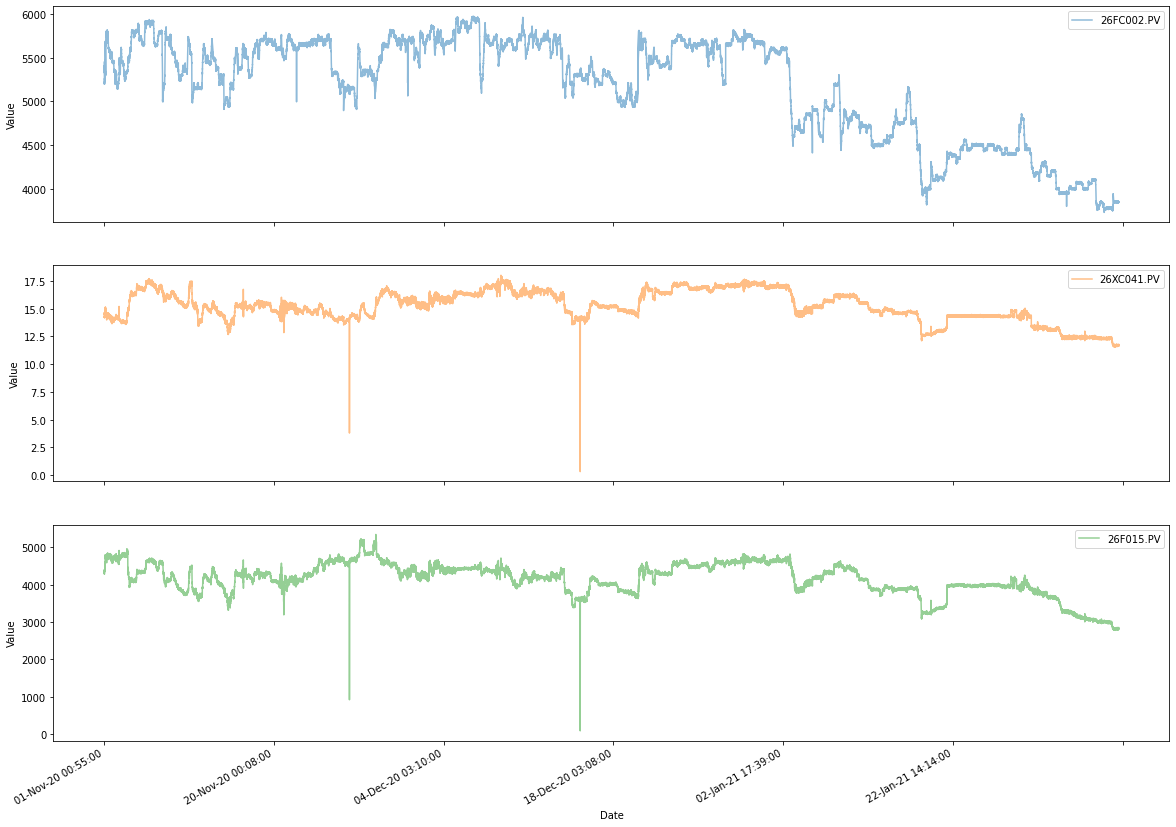

In [ ]:
#Remove negative values
qe_data = qe_data[(qe_data > 0).all(axis=1)]
cols= ['26FC002.PV' , '26XC041.PV' , '26F015.PV']
axes = qe_data[cols].plot(marker='None', alpha=0.5, linestyle='-', figsize=(20,15), subplots=True )
for ax in axes:
  ax.set_ylabel('Value')

# Outlier

In [ ]:
qe_data.mean().sort_values() # Idea for group plot: 7 Groups

26PC038.PV       0.541944
26PC013.PV       0.619864
27PC001.SP       0.894646
27PC001.PV       0.894734
26PC302.PV       4.753871
                 ...     
26F015.PV     4155.699199
27FC001.PV    4914.684798
27FC001.SP    4915.068680
26FC011.PV    5150.339641
26FC002.PV    5178.486813
Length: 71, dtype: float64

In [ ]:
qe_data.columns

Index(['26FC002.PV', '26FC011.PV', '26FC016.PV', '26FC017.PV', '26FC027.PV',
       '26FC028.PV', '26FC029.PV', '26FC035.PV', '26FC301.PV', '26FC307.PV',
       '26LC008.PV', '26LC010.PV', '26PC007.PV', '26PC009.PV', '26PC010.PV',
       '26PC013.PV', '26PC038.PV', '26PC302.PV', '26PC305.PV', '26T025.PV',
       '26T027.PV', '26T032.PV', '26T033.PV', '26T034.PV', '26T035.PV',
       '26T038.PV', '26T041.PV', '26T042.PV', '26T043.PV', '26T044.PV',
       '26T045.PV', '26TC011.PV', '26TC029.PV', '26TC031.PV', '26TC039.PV',
       '26TC301.PV', '26TC307.PV', '26XC041.PV', '27FC001.PV', '27FC009.PV',
       '27LC002.PV', '27PC001.PV', '27Q001.PV', '27TC007.PV', '26F014.PV',
       '26F015.PV', '26F019.PV', '26TC011.SP', '26TC029.SP', '26TC031.SP',
       '26TC039.SP', '26TC301.SP', '26TC307.SP', '26XC041.SP', '27FC001.SP',
       '27FC009.SP', '27LC002.SP', '27PC001.SP', '27TC007.SP', '26TC011.OP',
       '26TC029.OP', '26TC031.OP', '26TC039.OP', '26TC301.OP', '26TC307.OP',
       '26XC041

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  del sys.path[0]


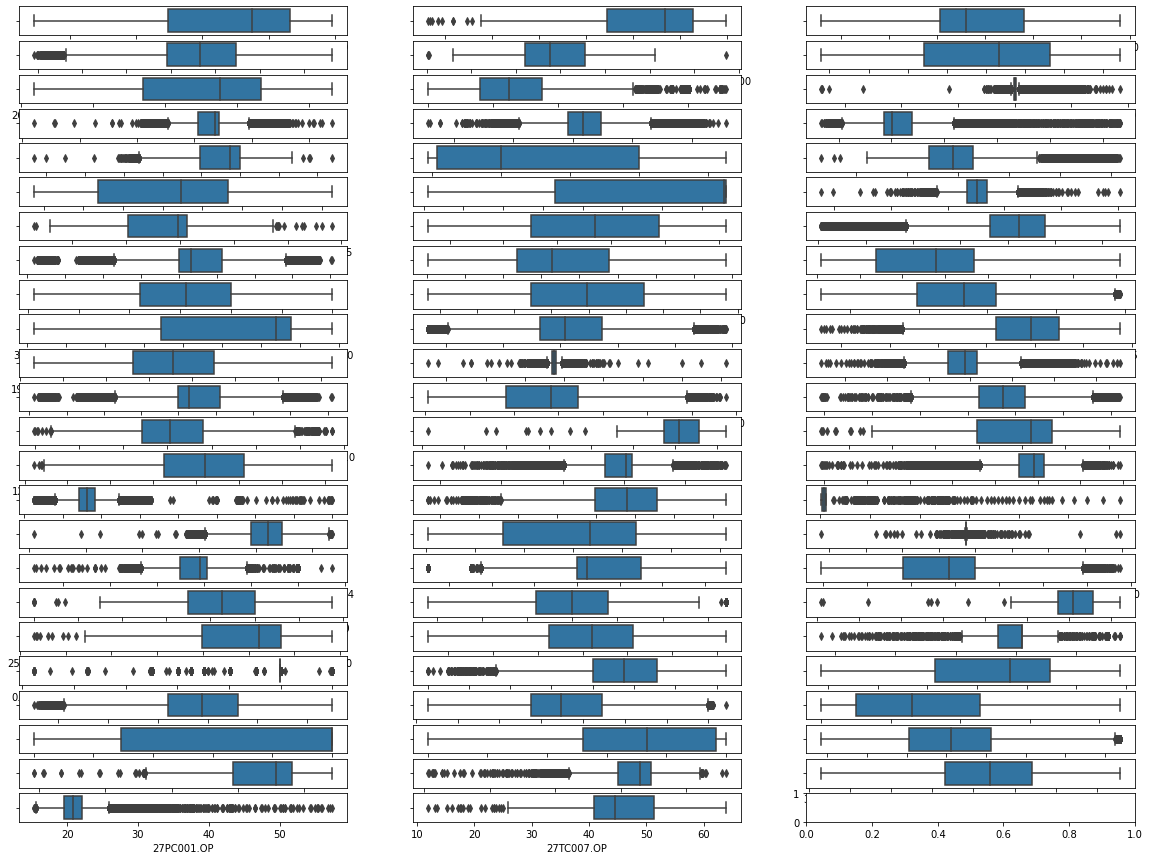

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

names = list(qe_data.columns)
f, axes = plt.subplots(round(len(names)/3), 3,figsize=(20,15))  
y = 0;
for name in names:
    i, j = divmod(y, 3)
    sns.boxplot(x=qe_data[name], ax=axes[i, j])
    y = y + 1
plt.tight_layout()
plt.show()

# Outlier Treatment 

In [ ]:
 def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)

        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    

        for col in df.columns:
            df1[col] = df[col]

        return (qe_data)

In [ ]:
qe_data_iqr = mod_outlier(qe_data)

In [ ]:
qe_data_iqr

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01-Nov-20 00:55:00,5446.704187,5110.939352,303.125284,1124.051155,2631.022430,373.061224,359.129230,0.049471,79.469816,195.912979,59.785395,57.654668,24.007835,10.498089,11.666978,0.818040,0.630034,4.764552,23.981215,52.427309,28.213474,144.599795,208.777296,242.905368,112.502797,88.777866,241.775740,343.436417,38.720967,69.915878,197.843002,285.724626,106.090141,146.610714,127.405818,49.243334,39.890624,14.589873,5298.957749,2657.993203,60.210685,0.902633,12.878100,93.282876,48.694198,4322.721434,21.323754,285.494263,106.452896,145.5000,127.274211,45.0,36.0,14.622089,5286.305705,2675.342871,60.580307,0.89988,93.251854,51.189174,50.644569,32.941264,43.000000,100.0,100.000000,86.801418,58.281270,73.296757,60.181835,24.039800,53.606440
01-Nov-20 08:40:00,5358.612672,4938.995605,332.154373,1163.560181,2451.894043,361.309062,348.181549,3.837242,80.688198,175.817642,59.805651,60.487016,23.994728,10.500893,11.647099,0.745561,0.630002,4.709437,24.142238,52.719012,27.923747,144.599795,209.102383,242.900232,112.885721,88.364723,241.687247,343.383819,37.926977,70.370855,198.394559,285.677989,106.678446,146.610714,129.163365,47.658968,39.160746,14.508318,5112.914924,2723.831548,61.848872,0.893918,12.519241,92.976155,32.537542,4310.815674,20.334556,285.494263,106.452896,145.5000,129.952004,45.0,36.0,14.514006,5179.618262,2675.886800,60.580307,0.89988,93.251854,49.803326,51.979444,30.684336,43.000000,100.0,100.000000,86.680956,59.116005,73.843439,60.227799,23.803212,53.996600
01-Nov-20 09:10:00,5359.861572,4951.890625,313.891785,1128.905090,2384.207764,360.795399,349.088314,0.000239,80.208164,194.516922,59.965793,59.372309,23.998340,10.501012,11.639516,0.750732,0.629998,4.790708,23.997999,53.044987,27.970840,144.599795,209.351730,243.548154,113.733728,89.566772,242.238996,343.357262,37.521318,70.833980,198.712923,285.640223,106.273360,146.610714,129.689348,47.617224,39.191998,14.605156,5183.051060,2659.446531,60.575911,0.898419,12.475430,93.231083,12.525895,4349.128418,20.327217,285.494263,106.452896,145.5000,127.764503,45.0,36.0,14.618247,5200.657690,2643.425285,60.580307,0.89988,93.251854,49.878563,51.147001,29.750581,43.000000,100.0,100.000000,86.707810,58.788543,73.454487,60.417166,22.143882,52.119687
01-Nov-20 09:11:00,5350.362061,4952.585938,322.365219,1157.823669,2372.898804,360.069519,349.406494,9.078151,80.955231,184.939888,59.409989,60.738272,23.994455,10.501015,11.611349,0.752314,0.629998,4.794266,24.113438,52.872321,27.972410,144.599795,209.344003,243.473901,113.803990,89.636283,242.165138,343.354639,37.501069,71.176607,198.695667,285.638964,106.926137,146.610714,132.780354,47.685521,39.193040,14.569252,5201.619565,2651.947825,60.391247,0.899707,12.475183,93.297811,18.266161,4336.737305,20.378664,285.494263,106.452896,145.5000,131.885397,45.0,36.0,14.583746,5176.537207,2639.042204,60.580307,0.89988,93.251854,50.070421,52.295432,29.880078,43.000000,100.0,100.000000,86.708874,58.473965,73.410735,60.423479,22.125782,51.809872
01-Nov-20 10:40:00,5355.116211,4976.521973,321.103439,1121.452637,2311.899658,358.102982,344.761169,0.000293,79.747995,173.153572,59.984636,58.015763,23.977855,10.501366,11.646015,0.

**Box plot after IQR replacing**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  if sys.path[0] == '':


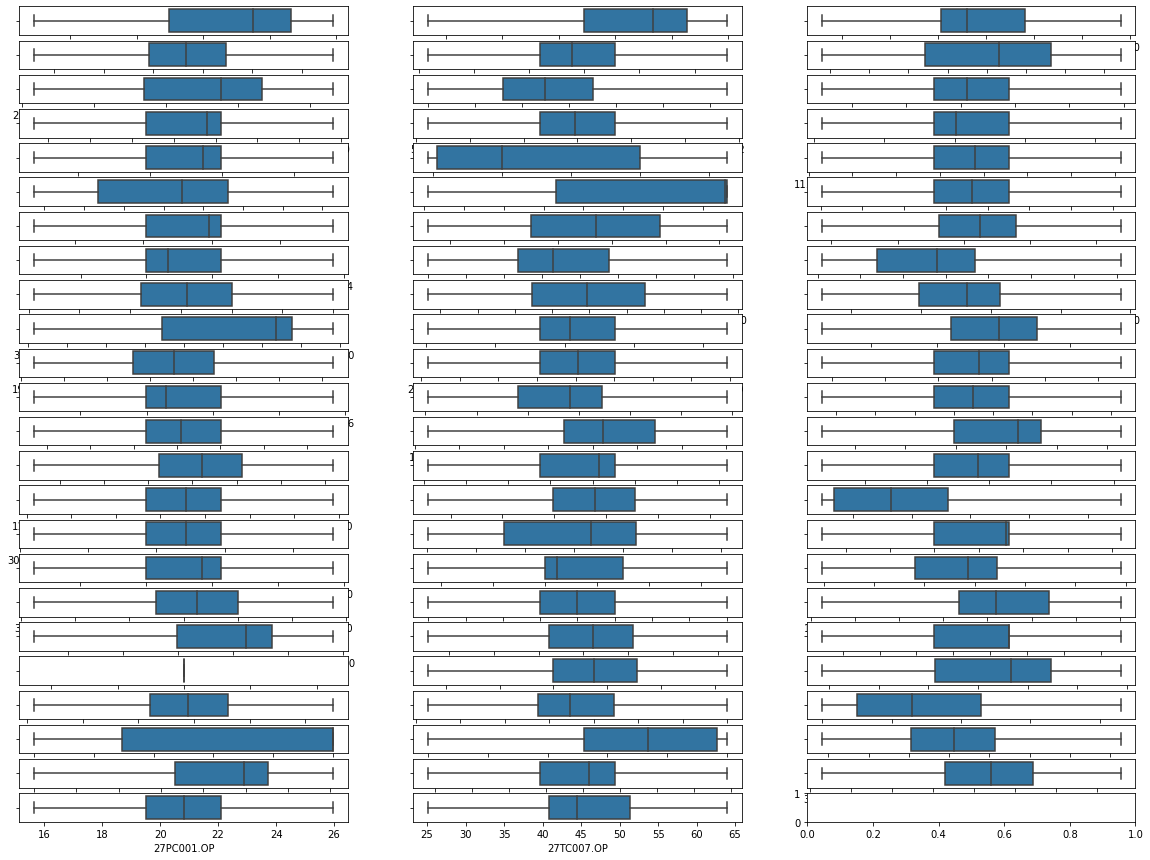

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

names = list(qe_data_iqr.columns)
f, axes = plt.subplots(round(len(names)/3), 3,figsize=(20,15))  
y = 0;
for name in names:
    i, j = divmod(y, 3)
    sns.boxplot(x=qe_data_iqr[name], ax=axes[i, j])
    y = y + 1
plt.tight_layout()
plt.show()

# Resampling Data

**DataFrame.resample(rule, axis=0, closed=None, label=None, convention='start', kind=None, loffset=None, base=None, on=None, level=None, origin='start_day', offset=None)
**

In [ ]:
qe_data_iqr.tail()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12-Feb-21 22:32:00,3851.282146,3802.195860,252.981003,1316.381117,3007.712830,248.001068,236.760077,160.006348,80.083400,170.944738,56.186846,48.141396,24.017174,10.205412,11.856509,0.348046,0.328444,4.792923,23.488827,36.182808,27.840366,152.972552,205.483860,218.968476,126.427545,105.885527,217.127370,342.223940,33.368943,63.992899,199.240257,285.568581,110.420038,155.007504,110.262369,44.934505,41.644740,11.689281,3651.820671,1808.998341,51.631620,0.894247,12.284110,89.999066,52.767699,3107.513761,13.618145,285.478424,109.827363,154.8134,110.562937,44.5,42.0,11.702808,3644.429622,1820.262687,52.037151,0.89988,90.002068,33.798227,58.793932,37.653214,3.104854,100.0,56.714063,69.741351,49.654262,49.878383,40.328535,19.442937,36.867500
12-Feb-21 22:33:00,3847.556603,3820.470040,257.386605,1319.276527,3021.978254,248.657530,236.000749,160.006348,80.375367,167.699674,55.629936,48.495671,24.017148,10.205423,11.856509,0.347206,0.325850,4.799142,23.492586,36.174073,27.836808,152.776225,205.530144,218.942854,126.390083,106.285312,217.123163,342.225519,33.384677,63.998906,199.232738,285.568102,110.420038,154.859800,110.338506,44.942189,41.658796,11.679147,3735.079218,1807.120919,51.547658,0.894719,12.285443,89.998339,46.929089,3107.513761,13.614788,285.478424,109.827363,154.8134,110.116922,44.5,42.0,11.702808,3628.356340,1808.186300,52.037151,0.89988,90.002068,33.768194,59.336285,37.849567,2.258076,100.0,56.614455,69.750898,49.044016,50.664642,40.322241,19.595974,36.692284
12-Feb-21 22:34:00,3853.120737,3811.976506,257.884915,1311.600872,3023.086593,249.938324,236.734462,160.006348,79.589861,168.718696,55.415480,48.253946,24.017121,10.205435,11.856509,0.349883,0.327802,4.805361,23.496344,36.162821,27.833250,152.635048,205.581728,218.917232,126.877933,106.873681,217.118955,342.227098,33.400410,63.281007,199.225220,285.567622,110.420038,154.633175,110.931489,44.949872,41.672851,11.641097,3599.104284,1802.385668,51.998031,0.894356,12.287841,89.997613,40.370733,3107.513761,13.654725,285.478424,109.827363,154.8134,111.162538,44.5,42.0,11.702808,3594.448844,1823.005965,52.037151,0.89988,90.002068,33.737697,58.609437,38.240653,1.411297,100.0,56.514847,69.760445,48.734552,51.458296,40.315947,19.689507,36.195353
12-Feb-21 22:35:00,3852.038678,3798.939773,253.443275,1284.017826,3043.971421,250.231723,236.553163,160.006348,79.486336,171.710331,56.067877,47.659660,24.017095,10.205447,11.856509,0.349196,0.326985,4.811580,23.480322,36.151570,27.829692,152.751572,205.577831,218.891610,126.662525,106.716636,217.114748,342.228677,33.416144,62.802361,199.217701,285.567142,110.420038,154.752699,109.886798,44.957555,41.686907,11.654206,3582.908992,1813.392364,52.327907,0.889100,12.287884,89.996886,33.812376,3107.513761,13.641002,285.478424,109.827363,154.8134,110.548798,44.5,42.0,11.702808,3618.692887,1828.400857,52.037151,0.89988,90.002068,33.771546,57.766039,37.904860,0.564519,100.0,56.415239,69.769992,49.228467,52.251951,40.309653,19.587964,36.151402
12-Feb-21 22:36:00,3850.832157,3803.030366,250.170380,1284.061287,3006.889627,250.092008,237.056377,160.006348,79.666314,173.436859,56.333620,47.597027,24.017069,10.205459,11.856

In [ ]:
qe_data_iqr.index = pd.to_datetime(qe_data_iqr.index) # converted to datetime as index 
qe_data_iqr.tail()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-12 22:32:00,3851.282146,3802.195860,252.981003,1316.381117,3007.712830,248.001068,236.760077,160.006348,80.083400,170.944738,56.186846,48.141396,24.017174,10.205412,11.856509,0.348046,0.328444,4.792923,23.488827,36.182808,27.840366,152.972552,205.483860,218.968476,126.427545,105.885527,217.127370,342.223940,33.368943,63.992899,199.240257,285.568581,110.420038,155.007504,110.262369,44.934505,41.644740,11.689281,3651.820671,1808.998341,51.631620,0.894247,12.284110,89.999066,52.767699,3107.513761,13.618145,285.478424,109.827363,154.8134,110.562937,44.5,42.0,11.702808,3644.429622,1820.262687,52.037151,0.89988,90.002068,33.798227,58.793932,37.653214,3.104854,100.0,56.714063,69.741351,49.654262,49.878383,40.328535,19.442937,36.867500
2021-02-12 22:33:00,3847.556603,3820.470040,257.386605,1319.276527,3021.978254,248.657530,236.000749,160.006348,80.375367,167.699674,55.629936,48.495671,24.017148,10.205423,11.856509,0.347206,0.325850,4.799142,23.492586,36.174073,27.836808,152.776225,205.530144,218.942854,126.390083,106.285312,217.123163,342.225519,33.384677,63.998906,199.232738,285.568102,110.420038,154.859800,110.338506,44.942189,41.658796,11.679147,3735.079218,1807.120919,51.547658,0.894719,12.285443,89.998339,46.929089,3107.513761,13.614788,285.478424,109.827363,154.8134,110.116922,44.5,42.0,11.702808,3628.356340,1808.186300,52.037151,0.89988,90.002068,33.768194,59.336285,37.849567,2.258076,100.0,56.614455,69.750898,49.044016,50.664642,40.322241,19.595974,36.692284
2021-02-12 22:34:00,3853.120737,3811.976506,257.884915,1311.600872,3023.086593,249.938324,236.734462,160.006348,79.589861,168.718696,55.415480,48.253946,24.017121,10.205435,11.856509,0.349883,0.327802,4.805361,23.496344,36.162821,27.833250,152.635048,205.581728,218.917232,126.877933,106.873681,217.118955,342.227098,33.400410,63.281007,199.225220,285.567622,110.420038,154.633175,110.931489,44.949872,41.672851,11.641097,3599.104284,1802.385668,51.998031,0.894356,12.287841,89.997613,40.370733,3107.513761,13.654725,285.478424,109.827363,154.8134,111.162538,44.5,42.0,11.702808,3594.448844,1823.005965,52.037151,0.89988,90.002068,33.737697,58.609437,38.240653,1.411297,100.0,56.514847,69.760445,48.734552,51.458296,40.315947,19.689507,36.195353
2021-02-12 22:35:00,3852.038678,3798.939773,253.443275,1284.017826,3043.971421,250.231723,236.553163,160.006348,79.486336,171.710331,56.067877,47.659660,24.017095,10.205447,11.856509,0.349196,0.326985,4.811580,23.480322,36.151570,27.829692,152.751572,205.577831,218.891610,126.662525,106.716636,217.114748,342.228677,33.416144,62.802361,199.217701,285.567142,110.420038,154.752699,109.886798,44.957555,41.686907,11.654206,3582.908992,1813.392364,52.327907,0.889100,12.287884,89.996886,33.812376,3107.513761,13.641002,285.478424,109.827363,154.8134,110.548798,44.5,42.0,11.702808,3618.692887,1828.400857,52.037151,0.89988,90.002068,33.771546,57.766039,37.904860,0.564519,100.0,56.415239,69.769992,49.228467,52.251951,40.309653,19.587964,36.151402
2021-02-12 22:36:00,3850.832157,3803.030366,250.170380,1284.061287,3006.889627,250.092008,237.056377,160.006348,79.666314,173.436859,56.333620,47.597027,24.017069,10.205459,1

In [ ]:
df = qe_data_iqr.resample('30min').median()
df.tail()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-12 20:30:00,3850.789400,3831.943419,257.306789,1296.861351,3055.940456,248.615408,235.610994,159.481535,79.990071,170.324380,55.992139,48.491751,24.005724,10.204146,11.856509,0.346972,0.326637,4.772732,23.535499,35.922162,28.347911,152.431487,204.747311,218.064592,126.079943,106.224618,216.354140,342.221426,33.864559,64.207797,198.591057,285.619109,110.420038,154.444792,110.207818,45.666591,41.642742,11.699655,3615.825658,1855.440166,52.337039,0.890239,12.222309,89.905656,30.952982,3107.513761,13.572003,285.478424,109.827363,154.8134,110.171891,44.5,42.0,11.702808,3643.845906,1853.853756,52.037151,0.89988,90.002068,33.630705,58.144867,39.238396,7.000034,100.0,66.475622,69.669781,49.324774,50.473810,40.916264,19.157275,38.903632
2021-02-12 21:00:00,3852.114592,3825.476482,245.578927,1304.691823,3064.623789,249.006235,236.872940,159.849449,80.012146,169.418245,55.817715,47.653343,24.005724,10.204499,11.856509,0.350775,0.328886,4.755660,23.485659,35.650961,28.177746,152.767177,205.268717,218.534469,126.284032,106.149935,216.853587,342.122793,33.503664,64.021900,199.054084,285.605746,110.420038,154.748413,110.157608,45.486791,41.746033,11.697950,3612.639263,1827.122287,51.710364,0.890737,12.223536,90.072244,29.821396,3107.513761,13.652441,285.478424,109.827363,154.8134,110.127525,44.5,42.0,11.702808,3625.084091,1827.023981,52.037151,0.89988,90.002068,33.844177,58.728922,38.490179,7.000034,100.0,64.329985,69.760506,49.099441,51.387766,40.776721,18.991737,37.348385
2021-02-12 21:30:00,3851.359610,3823.487416,257.329367,1303.434910,3066.847593,249.212878,237.583394,160.502288,80.018635,169.573979,56.039312,48.642020,24.005724,10.204852,11.856509,0.352418,0.331387,4.810279,23.545568,35.759779,28.009391,152.619277,205.041999,218.340130,126.135522,106.057749,216.673079,342.148927,33.361735,64.035246,198.852402,285.591360,110.420038,154.616459,110.070965,45.508908,41.590813,11.710989,3610.398306,1837.817157,52.077763,0.889052,12.222306,89.901387,9.931782,3107.513761,13.703475,285.478424,109.827363,154.8134,110.120143,44.5,42.0,11.702808,3635.560553,1832.103680,52.037151,0.89988,90.002068,33.981328,58.578127,38.817014,7.000034,100.0,61.285970,69.605734,49.184653,50.683810,40.627512,18.965100,37.815036
2021-02-12 22:00:00,3848.469743,3816.475600,255.019312,1289.197852,3064.443878,249.471879,236.570334,160.120928,80.054106,169.624257,56.093469,48.003972,24.017635,10.205206,11.856509,0.350052,0.329390,4.775627,23.502811,36.069885,27.902634,152.714298,205.244062,218.494625,126.438959,106.322137,216.792399,342.196303,33.244451,63.720180,199.112564,285.576973,110.420038,154.736181,110.239245,45.249943,41.574070,11.714429,3626.401003,1833.768112,51.930841,0.891991,12.257163,90.010329,32.687839,3107.513761,13.676176,285.478424,109.827363,154.8134,110.332077,44.5,42.0,11.702808,3637.459554,1828.457867,52.037151,0.89988,90.002068,33.804414,58.002869,38.490053,7.000034,100.0,58.683746,69.853356,49.290418,50.381312,40.438685,18.787257,37.681518
2021-02-12 22:30:00,3850.832157,3802.195860,253.443275,1294.953906,3023.086593,249.033640,236.760077,160.006348,79.666314,170.944738,56.067877,47.783759,24.017148,10.205423,11

In [ ]:
df.index = pd.to_datetime(df.index).strftime('%d/%m/%y %H:%M')
df.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/11/20 00:30,5446.704187,5110.939352,303.125284,1124.051155,2631.02243,373.061224,359.12923,0.049471,79.469816,195.912979,59.785395,57.654668,24.007835,10.498089,11.666978,0.81804,0.630034,4.764552,23.981215,52.427309,28.213474,144.599795,208.777296,242.905368,112.502797,88.777866,241.77574,343.436417,38.720967,69.915878,197.843002,285.724626,106.090141,146.610714,127.405818,49.243334,39.890624,14.589873,5298.957749,2657.993203,60.210685,0.902633,12.8781,93.282876,48.694198,4322.721434,21.323754,285.494263,106.452896,145.5,127.274211,45.0,36.0,14.622089,5286.305705,2675.342871,60.580307,0.89988,93.251854,51.189174,50.644569,32.941264,43.0,100.0,100.0,86.801418,58.28127,73.296757,60.181835,24.0398,53.60644
01/11/20 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/11/20 01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/11/20 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/11/20 02:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df)

4989

# Feature Engineering : Shift Data 

In [ ]:
lags = range(1, 9)  # lags for demonstration.
col_ = df.loc[:, ['27Q001.PV']] # change dataframe here

df_lag = df.assign(**{           # chage dataframe here
    '{} (t+{})'.format(col, t): col_[col].shift(-t)
    for t in lags
    for col in col_
})

df_lag.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,27Q001.PV (t+1),27Q001.PV (t+2),27Q001.PV (t+3),27Q001.PV (t+4),27Q001.PV (t+5),27Q001.PV (t+6),27Q001.PV (t+7),27Q001.PV (t+8)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/11/20 00:30,5446.704187,5110.939352,303.125284,1124.051155,2631.02243,373.061224,359.12923,0.049471,79.469816,195.912979,59.785395,57.654668,24.007835,10.498089,11.666978,0.81804,0.630034,4.764552,23.981215,52.427309,28.213474,144.599795,208.777296,242.905368,112.502797,88.777866,241.77574,343.436417,38.720967,69.915878,197.843002,285.724626,106.090141,146.610714,127.405818,49.243334,39.890624,14.589873,5298.957749,2657.993203,60.210685,0.902633,12.8781,93.282876,48.694198,4322.721434,21.323754,285.494263,106.452896,145.5,127.274211,45.0,36.0,14.622089,5286.305705,2675.342871,60.580307,0.89988,93.251854,51.189174,50.644569,32.941264,43.0,100.0,100.0,86.801418,58.28127,73.296757,60.181835,24.0398,53.60644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/11/20 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/11/20 01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/11/20 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/11/20 02:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# R-suqared from Regression

In [ ]:
df_lag.columns

Index(['26FC002.PV', '26FC011.PV', '26FC016.PV', '26FC017.PV', '26FC027.PV',
       '26FC028.PV', '26FC029.PV', '26FC035.PV', '26FC301.PV', '26FC307.PV',
       '26LC008.PV', '26LC010.PV', '26PC007.PV', '26PC009.PV', '26PC010.PV',
       '26PC013.PV', '26PC038.PV', '26PC302.PV', '26PC305.PV', '26T025.PV',
       '26T027.PV', '26T032.PV', '26T033.PV', '26T034.PV', '26T035.PV',
       '26T038.PV', '26T041.PV', '26T042.PV', '26T043.PV', '26T044.PV',
       '26T045.PV', '26TC011.PV', '26TC029.PV', '26TC031.PV', '26TC039.PV',
       '26TC301.PV', '26TC307.PV', '26XC041.PV', '27FC001.PV', '27FC009.PV',
       '27LC002.PV', '27PC001.PV', '27Q001.PV', '27TC007.PV', '26F014.PV',
       '26F015.PV', '26F019.PV', '26TC011.SP', '26TC029.SP', '26TC031.SP',
       '26TC039.SP', '26TC301.SP', '26TC307.SP', '26XC041.SP', '27FC001.SP',
       '27FC009.SP', '27LC002.SP', '27PC001.SP', '27TC007.SP', '26TC011.OP',
       '26TC029.OP', '26TC031.OP', '26TC039.OP', '26TC301.OP', '26TC307.OP',
       '26XC041

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.22.2.post1


In [ ]:
model = LinearRegression()

# Model_Reg

In [ ]:
data = df_lag.dropna()  # Main dataframe before Regression 

In [ ]:
data.head()

,26FC002.PV,26FC011.PV,26FC016.PV,26FC017.PV,26FC027.PV,26FC028.PV,26FC029.PV,26FC035.PV,26FC301.PV,26FC307.PV,26LC008.PV,26LC010.PV,26PC007.PV,26PC009.PV,26PC010.PV,26PC013.PV,26PC038.PV,26PC302.PV,26PC305.PV,26T025.PV,26T027.PV,26T032.PV,26T033.PV,26T034.PV,26T035.PV,26T038.PV,26T041.PV,26T042.PV,26T043.PV,26T044.PV,26T045.PV,26TC011.PV,26TC029.PV,26TC031.PV,26TC039.PV,26TC301.PV,26TC307.PV,26XC041.PV,27FC001.PV,27FC009.PV,27LC002.PV,27PC001.PV,27Q001.PV,27TC007.PV,26F014.PV,26F015.PV,26F019.PV,26TC011.SP,26TC029.SP,26TC031.SP,26TC039.SP,26TC301.SP,26TC307.SP,26XC041.SP,27FC001.SP,27FC009.SP,27LC002.SP,27PC001.SP,27TC007.SP,26TC011.OP,26TC029.OP,26TC031.OP,26TC039.OP,26TC301.OP,26TC307.OP,26XC041.OP,27FC001.OP,27FC009.OP,27LC002.OP,27PC001.OP,27TC007.OP,27Q001.PV (t+1),27Q001.PV (t+2),27Q001.PV (t+3),27Q001.PV (t+4),27Q001.PV (t+5),27Q001.PV (t+6),27Q001.PV (t+7),27Q001.PV (t+8)
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
03/11/20 10:00,5248.771561,4852.185919,322.244914,1165.337156,1933.419555,338.306925,323.860571,2.710908,79.638076,156.220389,58.969208,56.706511,24.014931,10.497913,11.670272,0.701045,0.629935,4.761905,24.053072,55.927802,30.169645,144.599795,210.584782,245.687328,116.886085,93.104324,244.465419,341.081407,38.923519,69.742446,199.885805,285.567243,106.322080,146.610714,126.838537,49.106584,37.287503,14.695992,5268.033433,2730.016307,61.304088,0.894256,13.205549,92.380954,53.504430,4577.087827,19.740579,285.464172,106.452896,145.5,126.983363,45.0,37.000000,14.707801,5072.098340,2689.192420,60.580307,0.89988,92.451866,46.235587,52.379201,24.121220,40.0,100.0,65.497858,93.425227,57.450480,76.758253,60.458844,25.091029,49.414820,12.824544,12.632175,12.426692,12.327889,12.314799,12.328449,12.392996,12.812427
03/11/20 10:30,5302.824438,4927.509636,323.101131,1157.884776,1942.922480,340.006731,326.662025,0.651786,79.677628,154.674610,60.371768,56.786631,24.011940,10.497394,11.678123,0.717534,0.629923,4.777636,24.081219,57.390552,30.564986,144.599795,210.634738,245.977856,116.918560,93.655334,244.681123,341.144987,39.673098,70.181119,200.079402,285.501167,105.972118,146.610714,126.791518,49.243334,37.397045,14.701190,5061.755049,2724.168599,60.361559,0.904454,12.824544,92.503073,52.488841,4606.090768,19.973264,285.464172,106.452896,145.5,127.419643,45.0,37.000000,14.685273,5110.674316,2677.988338,60.580307,0.89988,92.451866,46.780558,52.108915,24.413646,40.0,100.0,70.758837,93.571977,58.088407,78.125312,60.918502,25.955459,48.800294,12.632175,12.426692,12.327889,12.314799,12.328449,12.392996,12.812427,13.081980
03/11/20 11:00,5298.990058,4910.305838,327.912439,1154.354295,1861.896211,339.182537,325.266036,11.455170,79.961553,155.411969,60.076259,57.603365,23.984808,10.497164,11.646047,0.707982,0.629921,4.784608,24.093193,58.063856,30.740194,144.599795,210.860072,245.951240,117.737242,94.623637,244.754599,341.170274,39.640298,70.353185,200.233860,285.475258,106.268838,146.610714,129.711354,49.243334,37.463907,14.697993,5108.138404,2686.723486,61.086586,0.898615,12.632175,92.443862,15.521532,4599.989194,19.835232,285.464172,106.452896,145.5,129.295711,45.0,37.000000,14.703340,5117.850196,2698.908205,60.580307,0.89988,92.451866,46.483904,51.859769,23.351472,40.0,100.0,73.006019,93.698544,58.111081,77.038457,61.122214,25.955459,49.279195,12.426692,12.327889,12.314799,12.328449,12.392996,12.812427,13.081980,13.086504
03/11/20 11:30,5294.629335,4906.702433,326.409468,1156.406147,1821.459860,339.035397,325.275293,3.890040,80.296106,152.334594,59.728454,57.899666,24.011464,10.496839,11.632686,0.707413,0.629921,4.721958,24.129699,56.876515,30.987282,144.599795,210.881642,245.736149,118.396703,95.274825,244.603083,341.044294,39.717778,70.371796,200.210147,285.492405,106.587452,146.610714,134.051063,49.243334,37.341105,14.659893,5065.209613,2672.062393,58.999909,0.901051,12.426692,92.312126,17.196750,4574.801727,19.840581,285.464172,106.452896,145.5,134.369867,45.0,37.000000,14.637661,

In [ ]:
r_square_list=[]

for i in range(1,9):
  y_var = '27Q001.PV (t+{0})'.format(i)
  X = data.loc[:, :'27FC009.PV']
  y = data[y_var]
  model = model.fit(X, y)
  r_square_list.append(model.score(X, y))


In [ ]:
r_square_list

[0.6810238493340475,
 0.7271956916647757,
 0.7700408344946784,
 0.7869578731785691,
 0.7675520410323229,
 0.7270077554442167,
 0.6830374584499619,
 0.64360793453616]

In [ ]:
X = data.loc[:, :'27FC009.PV']
y = data['27Q001.PV']
model_1 = LinearRegression()
model_1.fit(X, y)
model_1.score(X, y)

0.6386275396834554

In [ ]:
X = data.loc[:, :'27FC009.PV']
y_1 = data['27Q001.PV (t+1)']
model_1 = LinearRegression()
model_1.fit(X, y_1)
model_1.score(X, y_1)

0.6810238493340475

In [ ]:
X = data.loc[:, :'27FC009.PV']
y_8 = data['27Q001.PV (t+8)']
model_8 = LinearRegression()
model_8.fit(X, y_8)
model_8.score(X, y_8)

0.64360793453616

In [ ]:
# best 
X = data.loc[:, :'27FC009.PV']
y_3 = data['27Q001.PV (t+3)']
model_3 = LinearRegression()
model_3.fit(X, y_3)
model_3.coef_

array([ 1.36618152e-05,  9.68899205e-04, -1.51244903e-03,  1.46452375e-04,
        7.69817332e-05,  9.56698135e-03, -7.42887289e-03,  8.26415210e-05,
        2.48216071e-02,  1.97330310e-03,  5.49204406e-03,  6.89853824e-03,
        1.53716683e-01, -1.17509131e-01,  3.17957003e-02, -6.04012012e-01,
       -3.31917980e-01,  1.56463220e-01,  2.96621615e-02,  1.80097497e-02,
       -1.80903430e-02, -1.92025174e-01,  1.75868073e-01,  3.82979604e-02,
       -2.46630614e-02,  2.10140175e-02, -3.65947496e-02,  1.57726774e-02,
        4.88793393e-03, -9.12376338e-03, -2.36249264e-01,  1.51159033e-01,
       -9.99596140e-04,  1.39420354e-01, -9.36283131e-03, -3.10498659e-04,
        1.62336508e-03, -2.77947705e-01, -2.25320006e-05, -1.10626028e-03])

In [ ]:
coee = np.array(model_3.coef_)

In [ ]:
x_list = list(X.columns)

In [ ]:
r_square = pd.DataFrame(r_square_list, columns=['r_square'])
r_square.loc[-1] = [str('0.5674956849358133')]  
r_square.index = r_square.index + 1  
r_square.sort_index(inplace=True) 
r_square

,r_square
0,0.5674956849358133
1,0.681024
2,0.727196
3,0.770041
4,0.786958
5,0.767552
6,0.727008
7,0.683037
8,0.643608


# Finding the unusal 

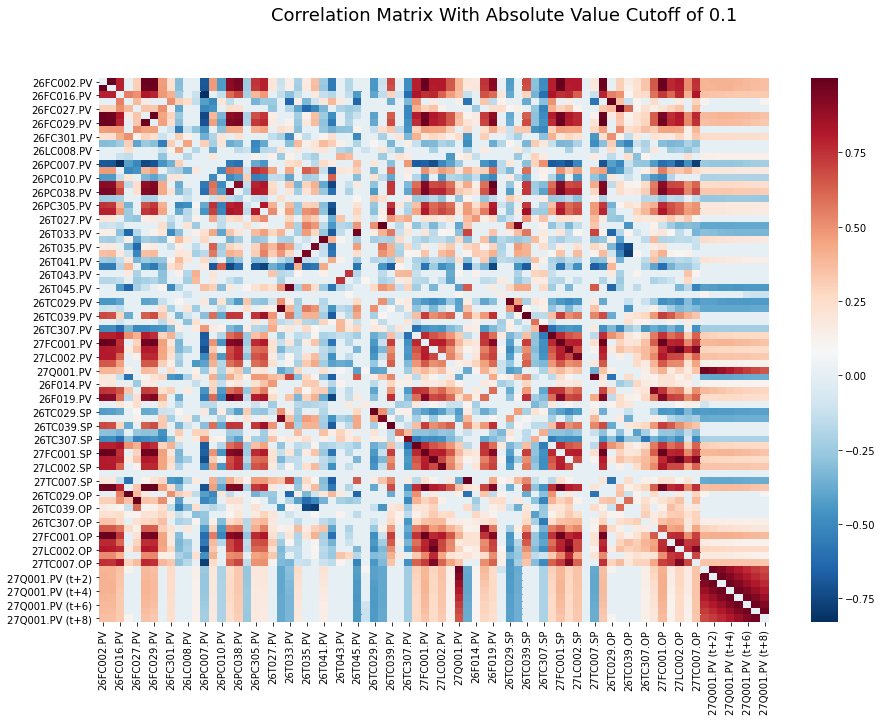

In [ ]:
def correlation_heatmap(data, cutoff=None, title=''):
    df_corr = data.corr('pearson')
    np.fill_diagonal(df_corr.values, 0)
    if cutoff != None:
        for col in df_corr.columns:
            df_corr.loc[df_corr[col].abs() <= cutoff, col] = 0
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(df_corr, ax=ax, cmap='RdBu_r')
    plt.suptitle(title, size=18)
    plt.show()
    return df_corr


cutoff = .1
df_corr = correlation_heatmap(data, 
                    cutoff, 'Correlation Matrix With Absolute Value Cutoff of {}'.format(cutoff)) 

In [ ]:
df_corr['27Q001.PV (t+3)'].sort_values(ascending=False)

27Q001.PV (t+2)    0.976707
27Q001.PV (t+4)    0.976690
27Q001.PV (t+1)    0.930327
27Q001.PV (t+5)    0.929733
27Q001.PV          0.875371
                     ...   
27TC007.PV        -0.392679
27TC007.SP        -0.393166
26TC029.PV        -0.423591
26TC029.SP        -0.427719
26T045.PV         -0.436711
Name: 27Q001.PV (t+3), Length: 79, dtype: float64

In [ ]:
data.corr()['27Q001.PV (t+3)'].sort_values(ascending=False) # Feed 

27Q001.PV (t+3)    1.000000
27Q001.PV (t+2)    0.976707
27Q001.PV (t+4)    0.976690
27Q001.PV (t+1)    0.930327
27Q001.PV (t+5)    0.929733
                     ...   
27TC007.PV        -0.392679
27TC007.SP        -0.393166
26TC029.PV        -0.423591
26TC029.SP        -0.427719
26T045.PV         -0.436711
Name: 27Q001.PV (t+3), Length: 79, dtype: float64

In [ ]:
qe_dara_corr = qe_data.corr()
qe_dara_corr['27Q001.PV'].sort_values(ascending=False) # Flow

27Q001.PV     1.000000
26F015.PV     0.393271
27FC001.OP    0.392445
26FC002.PV    0.382549
26FC011.PV    0.379142
                ...   
26T032.PV    -0.389397
26TC031.PV   -0.391413
26TC029.PV   -0.391442
26T045.PV    -0.410746
26TC029.SP   -0.416954
Name: 27Q001.PV, Length: 71, dtype: float64

In [ ]:
qe_roll_corr['26F015.PV'].sort_values(ascending=False) # unusal T041

NameError: ignored

In [ ]:
data.corr()['27Q001.PV (t+4)'].sort_values(ascending=False)

In [ ]:
data.corr()['27Q001.PV (t+2)'].sort_values(ascending=False)

In [ ]:
data.corr()['26T042.PV'].sort_values(ascending=False)

In [ ]:
data[['26T042.PV','26T041.PV']].plot(figsize=(20, 15))

In [ ]:
qe_rolling_mean = qe_data[['26T042.PV','26T041.PV']].rolling(window=30).median()
qe_rolling_mean = qe_rolling_mean.dropna()
qe_rolling_mean[['26T042.PV','26T041.PV']].plot(figsize=(20, 15))

In [ ]:
qe_rolling_mean.corr()

In [ ]:
qe_data.info()

In [ ]:
qe_roll = qe_data.rolling(window=30).mean()
qe_roll = qe_roll.dropna()
qe_roll

In [ ]:
qe_roll[['26T041.PV','26T042.PV']].plot(figsize=(15, 10))

In [ ]:
qe_roll_corr = qe_roll.corr()

In [ ]:
qe_roll_corr['26T042.PV'].sort_values(ascending=False)

In [ ]:
qe_roll_corr['26T041.PV'].sort_values(ascending=False)

In [ ]:
qe_roll_corr['27Q001.PV'].sort_values(ascending=False)